# Aprendizaje Automático I - Trabajo Práctico N°1

- Antuña, Franco (A-4637/1)
- Asad, Gonzalo (A-4595/1)
- Castells, Sergio (C-7334/2)

## Preparación del entorno

In [1]:
import gdown
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, ElasticNetCV, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline

In [2]:
# Definir el ID del archivo
file_id = '1BlbqsaI54UVdtRu8qJXIat6-2RgfPRG2'

# Crear la URL de descarga
download_url = f'https://drive.google.com/uc?id={file_id}'

# Descargar el archivo
output = 'house-prices-tp.csv'
gdown.download(download_url, output, quiet=True)

'house-prices-tp.csv'

In [3]:
df = pd.read_csv('house-prices-tp.csv')

## Análisis descriptivo

Observamos rápidamente el contenido del dataset.

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.07151,0.0,4.49,0.0,0.449,6.121,56.8,3.7476,3.0,247.0,18.5,395.15,8.44,22.2
1,0.08265,0.0,13.92,0.0,0.437,6.127,18.4,5.5027,4.0,289.0,16.0,396.90,8.58,23.9
2,0.12816,12.5,6.07,0.0,0.409,5.885,33.0,6.4980,4.0,345.0,18.9,396.90,8.79,20.9
3,0.08873,21.0,5.64,0.0,0.439,5.963,45.7,6.8147,4.0,243.0,16.8,395.56,13.45,19.7
4,0.11432,0.0,8.56,0.0,0.520,6.781,71.3,2.8561,5.0,384.0,20.9,395.58,7.67,26.5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556 entries, 0 to 555
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     533 non-null    float64
 1   ZN       534 non-null    float64
 2   INDUS    541 non-null    float64
 3   CHAS     533 non-null    float64
 4   NOX      532 non-null    float64
 5   RM       535 non-null    float64
 6   AGE      532 non-null    float64
 7   DIS      541 non-null    float64
 8   RAD      528 non-null    float64
 9   TAX      538 non-null    float64
 10  PTRATIO  528 non-null    float64
 11  B        534 non-null    float64
 12  LSTAT    534 non-null    float64
 13  MEDV     535 non-null    float64
dtypes: float64(14)
memory usage: 60.9 KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,533.000000,534.000000,541.000000,533.000000,532.000000,535.000000,532.000000,541.000000,528.000000,538.000000,528.000000,534.000000,534.000000,535.000000
mean,5.845517,13.197175,11.218725,0.090056,0.560050,6.291839,67.632303,3.944102,9.699379,409.575089,18.429904,347.806040,13.028092,22.746809
std,13.828631,24.902981,6.942021,0.286531,0.119472,0.782403,28.461925,2.255689,8.684495,167.689379,2.194759,99.636208,7.579972,9.491452
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.084470,0.000000,5.130000,0.000000,0.453000,5.875500,42.275000,2.112100,4.000000,279.000000,17.000000,369.530000,7.150000,16.750000
50%,0.315330,0.000000,9.690000,0.000000,0.538000,6.208000,76.500000,3.340107,5.000000,335.000000,19.000000,390.815000,11.465000,21.200000
75%,4.871410,20.000000,18.100000,0.000000,0.643986,6.638500,93.825000,5.400700,23.632660,666.000000,20.200000,395.890000,17.205000,26.300000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Recorriendo el data set, observamos que existen valores nulos sin embargo no tenemos valores duplicados. Todos los datos son del tipo float64, a pesar de que la variable 'CHAS' debería ser una variable categórica.

## Análisis exploratorio

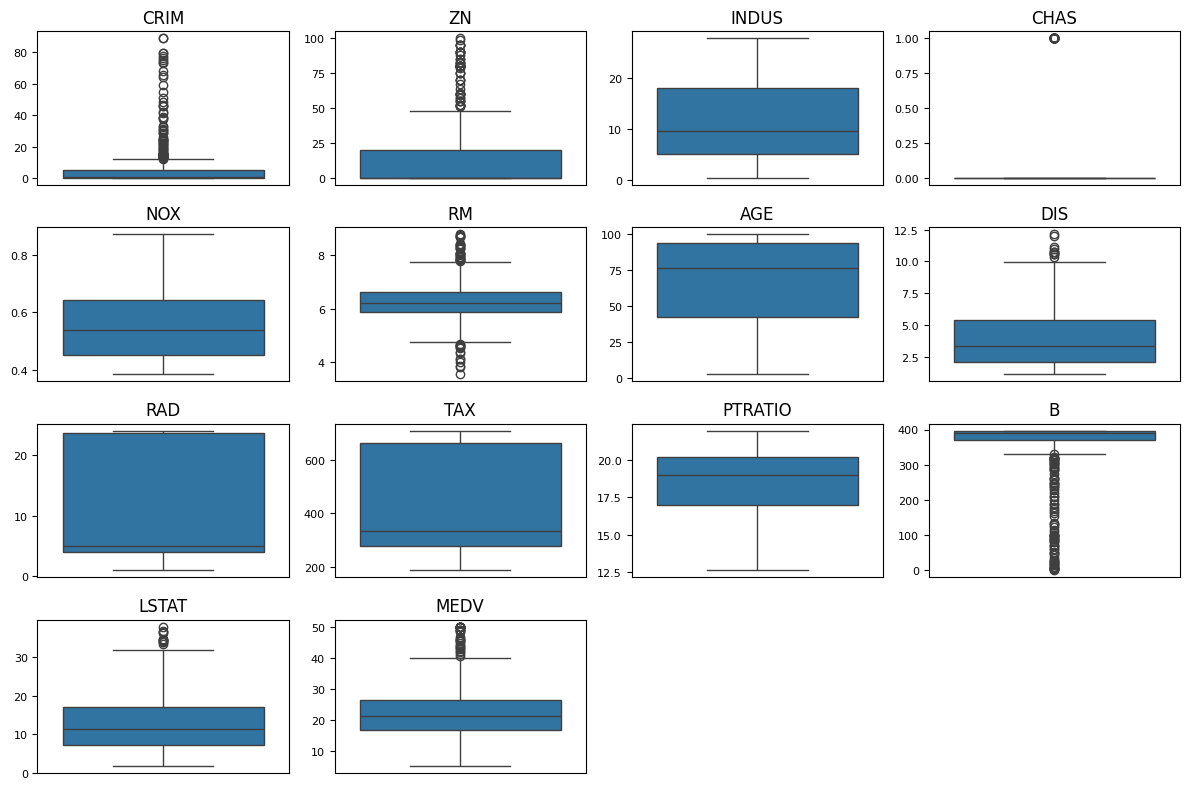

In [8]:
# Crear diagrama de caja individual para cada variable
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns):
    plt.subplot(4, 4, i+1)
    # plt.boxplot(df[column])
    sns.boxplot(data = df[column])
    plt.title(column)
    plt.ylabel('')
    plt.xticks([])
    plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

In [9]:
sns.pairplot(df.drop(columns=['CHAS']))

Output hidden; open in https://colab.research.google.com to view.


Observamos que:

1. La tasa de criminalidad per cápita por ciudad (CRIM) presenta una distribución asimétrica hacia la derecha concentrando el 75% de sus registros en valores inferiores a 4.87. No obstante, el 25% de los registros restantes adopta valores que van en crecimiento, alcanzando un máximo de 88.97 los cuales no se consideran outliers. Esto podría interpretarse como que, en general, la tasa de criminalidad per cápita suele ser baja.

2. La proporción de terrenos residenciales zonificados para lotes de más de 25000 pies cuadrados (ZN) presenta una distribución con una moda muy marcada concentrando el 50% de sus valores en 0. El 50% restante se distribuye de manera más homogenea hasta alcanzar un valor máximo de 100. No presenta outliers.

3. La proporción de acres de negocios no minoristas por ciudad (INDUS) presenta una distribución bimodal. El 50% de los datos varía entre 5.13 y 18.1. No contiene outliers. Parece haber dos grupos de proporciones de negocios, probablemente condicionados a otra variable.

4. La variable dummy (categórica) del río Charles (CHAS) adopta valor 1 si el tramo limita con el río o 0 en caso contrario.

5. La concentración de óxidos de nitrógeno medidos en ppm (NOX) presenta una distribución bastante homogénea ligeramente asimétrica hacia la derecha con valores que varían en el rango 0.38 - 0.87. Podríamos pensar que tiende a tener concentraciones más cercanas al valor mínimo.

6. El número promedio de habitaciones por vivienda (RM) presenta una distribución campanular con valor medio 6.29 y desvío estándar 0.78.

7. La proporción de unidades ocupadas por sus propietarios construidas antes de 1940 (AGE) presenta una distribución asimétrica hacia la izquierda con el 75% de los valores mayores a 42.27.

8. La distancias ponderadas a cinco centros de empleo de Boston (DIS) presentan una clara asimetría hacia la derecha en donde el 75% los valores varian desde 1.12 a 5.4, siendo máximo valor registrado de 12.12.

9. El índice de accesibilidad a las autopistas radiales (RAD) presenta un distribución bimodal.

10. La tasa de impuesto sobre la propiedad a valor completo por $10,000 (TAX) presenta una distribución bimodal con valores agrupados en torno a valores bien marcados. El 50% de los datos asume valores que van desde 187 a 335 mientras que el 50% restante asume valores de hasta 711.

11. La proporción alumno-maestro por ciudad (PTRATIO) presenta una distribución campanular asimétrica a la izquierda, con media 18.4 y mediana 19.

12. El resultado de la ecuación B=1000(Bk - 0.63)^2 donde Bk es la proporción de negros por ciudad (B) presenta una distribución asimétrica a la izquierda con poca dispersión. En otras palabras, los datos se encuentran muy concentrados a la derecha en valores en torno a los 390.

13. El porcentaje de población de menor estatus socioeconómico (LSTAT) presenta una leve asimetría hacia la derecha.

14. El valor mediano de las viviendas ocupadas por sus propietarios en miles de dólares (MEDV) presenta una distrivución campanular con una leve asimetría hacia la derecha en la cual el 75% de los registros asume valores en el rango 5 - 26.3.


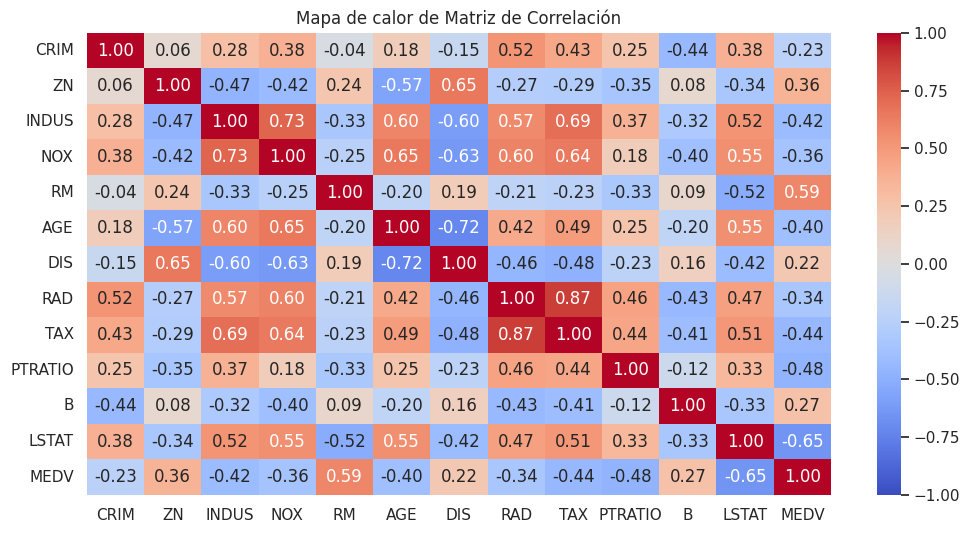

In [10]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.heatmap(df.drop(columns=['CHAS']).corr(method = 'pearson'), annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Mapa de calor de Matriz de Correlación')
plt.show()

Realizando el mapa de correlación entre variables, observamos que:
* Existe una fuerte correlación lineal positiva entre las variables 'RAD' y 'TAX', indicando que a mayor índice de accesabilidad a autopistas radiales se espera una tasa de impuestos mayor.
* Existe también una moderada/alta correlación lineal negativa entre las variables 'DIS' y 'AGE', indicando que hay una tendencia a que las propiedades más antiguas sean las más alejadas a los centros de empleo.
* Las variables que más correlación lineal tienen con la variable de salida 'MEDV' son 'LSTAT' y 'RM', negativa y positiva respectivamente. Esto podría indicar que a menor porcentaje de población de menor estatus socioeconómico, mayor sería el precio de la vivienda. Por otro lado, parece indicar que a mayor número de habitaciones aumentaría el precio de las viviendas.

## Limpieza, imputación y escalado

Contabilizamos los datos nulos.

In [11]:
df.isna().sum()

,0
CRIM,23
ZN,22
INDUS,15
CHAS,23
NOX,24
RM,21
AGE,24
DIS,15
RAD,28
TAX,18


Eliminamos todas las filas donde la variable 'MEDV' tiene valor NaN, ya que pierde el sentido tenerlas si vamos a hacer un modelo que las prediga.

In [12]:
index_NaN = df[df['MEDV'].isna()].index
df.drop(index_NaN, inplace=True)
df.reset_index(drop=True, inplace=True)

Categorizamos la variable 'CHAS'.

In [13]:
df['CHAS'] = df['CHAS'].astype('category')

Hacemos la separación del dataset entre la variable de salida 'MEDV' y el resto de los datos. A estos últimos los separamos entre datasets de entrenamiento y de pruebas. Consideramos que no es necesario usar datos de validación, ya que los algoritmos de Lasso, Ridge y ElasticNet hacen la separación de los datos de entrenamiento para obtener datos de validación automáticamente. Por otro lado, Linear Regression no los necesita y si bien los métodos de gradiente descendiente los pueden usar, consideramos que creando datasets de validación nos reduciría demasiado el dataset de entrenamiento, que ya de por sí no es muy grande.

In [14]:
# Dividimos el dataset en datos de entrenamiento y de testeo
X = df.drop('MEDV', axis=1)
y = df['MEDV']

# Creamos datasets de entrenamiento y de pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y.values.reshape(-1,1), test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

# # Dividimos el dataset de entrenamiento para conseguir un dataset de validación
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42) # 0.25 x 0.8 = 0.2

# X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((428, 13), (107, 13), (428, 1), (107, 1))

Elegimos el imputador KNN sobre todas las variables porque consideramos que teniendo todas las columnas a disposición, tomaría mejores decisiones sobre la elección de vecinos en todas sus dimensiones.

In [15]:
# Imputamos con KNN Imputer
imputador_knn = KNNImputer()

X_train_imputado = imputador_knn.fit_transform(X_train)
# X_val_imputado = imputador_knn.transform(X_val)
X_test_imputado = imputador_knn.transform(X_test)

Luego escalamos el dataset con un escalador estándar, para mantener el promedio de los datos en 0 y su desviación estándar en 1. Suponemos que esto podría resultar en un mejor desempeño de ajuste.

In [16]:
# Escalamos con un escalador estándar
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_imputado)
# X_val_scaled = scaler.transform(X_val_imputado)
X_test_scaled = scaler.transform(X_test_imputado)

## Resolución del problema

### Regresión lineal

Coeficientes: [[ 0.33691499  1.74574883  0.19394627  1.74753352 -2.04622871  2.67731581
  -1.26550291 -4.12454684  1.43696124 -1.77539293 -1.9267819   0.58175029
  -3.54589665]]

Ordenada al origen: [22.57884202]



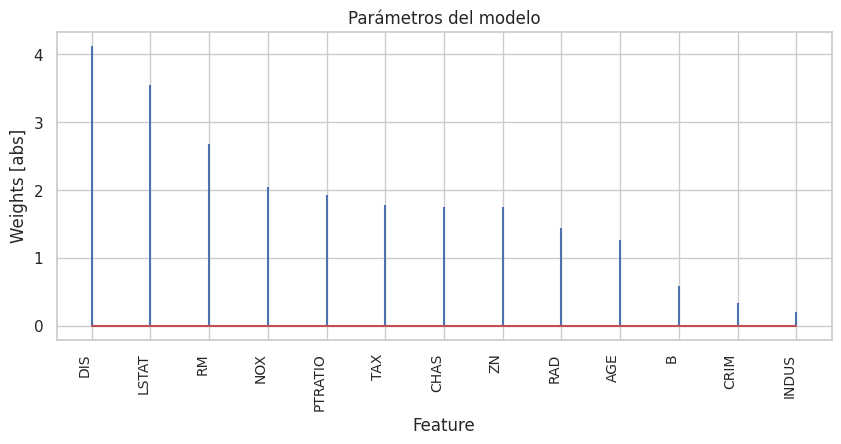


RMSE para datos de train: 5.466612027818442
R2 para datos de train: 0.6732759042365406

RMSE para datos de test: 7.306311541242918
R2 para datos de test: 0.35816922723350453


In [17]:
# Creamos un modelo basado en una regresión lineal simple
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Predecimos los valores de salida
y_pred_lr = lr.predict(X_test_scaled)
print(f'Coeficientes: {lr.coef_}')
print(f'\nOrdenada al origen: {lr.intercept_}\n')

#Graficamos coeficientes
df_coef_lr = pd.DataFrame({'predictor': X_train.columns, 'coef': abs(lr.coef_.flatten())}).sort_values(by='coef', ascending=False)
fig, ax = plt.subplots(figsize=(10, 4))
ax.stem(df_coef_lr.predictor, df_coef_lr.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('Feature')
ax.set_ylabel('Weights [abs]')
ax.set_title('Parámetros del modelo')
plt.show()

# Calculamos el error cuadrático medio (MSE) y el coeficiente de determinación (R2) para los datos de train
rmse_lr_train = mean_squared_error(y_train, lr.predict(X_train_scaled), squared=False)
r2_lr_train = r2_score(y_train, lr.predict(X_train_scaled))
print(f'\nRMSE para datos de train: {rmse_lr_train}')
print(f'R2 para datos de train: {r2_lr_train}')

# Calculamos el error cuadrático medio (MSE) y el coeficiente de determinación (R2) para los datos de test
rmse_lr_test = mean_squared_error(y_test, y_pred_lr, squared=False)
r2_lr_test = r2_score(y_test, y_pred_lr)
print(f'\nRMSE para datos de test: {rmse_lr_test}')
print(f'R2 para datos de test: {r2_lr_test}')

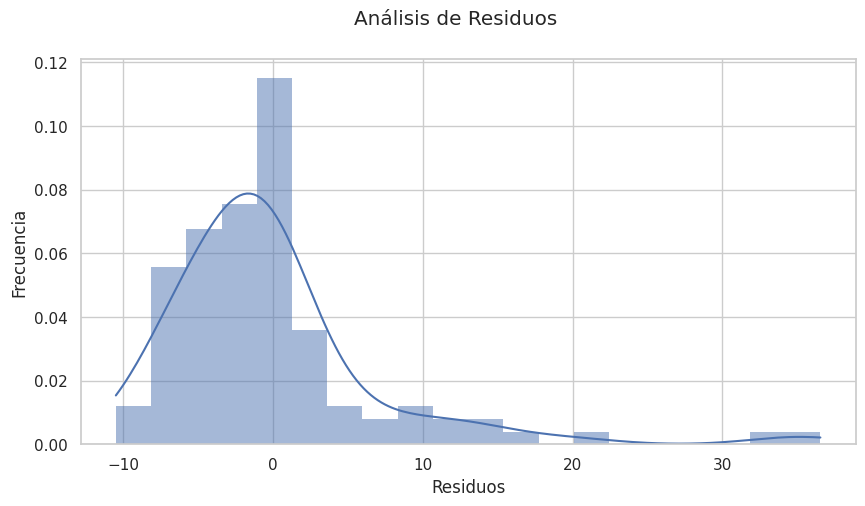

In [18]:
# Graficamos la distribución de los residuos
fig = plt.figure(figsize=(10,5))
sns.histplot((y_test - y_pred_lr), color="red", kde=True, stat="density", linewidth=0, bins=20, legend=False)
fig.suptitle('Análisis de Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

### Gradiente descendiente

#### Funciones

In [19]:
def gradient_descent(X_train, y_train, X_test, y_test, lr=0.01, epochs=100, graph=True):
    """
    shapes:
        X_train = nxm
        y_train = nx1
        X_test = pxm
        y_test = px1
        W = mx1
    """
    n = X_train.shape[0]
    m = X_train.shape[1]

    o = X_test.shape[0]

    # Poner columna de unos a las matrices X
    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_test = np.hstack((np.ones((o, 1)), X_test))


    # Inicializar pesos aleatorios
    W = np.random.randn(m+1).reshape(m+1, 1)

    train_errors = []  # Para almacenar el error de entrenamiento en cada época
    test_errors = []   # Para almacenar el error de prueba en cada época

    for _ in range(epochs):
        # Calcular predicción y error de entrenamiento
        prediction_train = np.matmul(X_train, W)
        error_train = y_train - prediction_train
        #print(error_train)
        train_mse = np.mean(error_train ** 2)
        train_errors.append(train_mse)

        # Calcular predicción y error de prueba
        prediction_test = np.matmul(X_test, W)
        error_test = y_test - prediction_test
        test_mse = np.mean(error_test ** 2)
        test_errors.append(test_mse)

        # Calcular el gradiente y actualizar pesos
        grad_sum = np.sum(error_train * X_train, axis=0)
        grad_mul = -2/n * grad_sum  # 1xm
        gradient = np.transpose(grad_mul).reshape(-1, 1)  # mx1

        W = W - (lr * gradient)

    if graph:
      # Graficar errores de entrenamiento y prueba
      # Definir una figura
      plt.figure(figsize=(12, 6))
      # Plotear errores de entrenamiento
      plt.plot(train_errors, label='Error de entrenamiento')
      # Plotear errores de prueba
      plt.plot(test_errors, label='Error de prueba')
      # Poner labels en los ejes
      plt.xlabel('Época')
      plt.ylabel('Error cuadrático medio')
      # Activar la leyenda
      plt.legend()
      # Poner titulo
      plt.title('Error de entrenamiento y prueba vs iteraciones (GD)')
      # Terminar y mostrar gráfico
      plt.show()

    return W

In [20]:
def stochastic_gradient_descent(X_train, y_train, X_test, y_test, lr=0.01, epochs=100):

    n = X_train.shape[0]
    m = X_train.shape[1]

    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

    W = np.random.randn(m + 1).reshape(-1, 1)

    train_errors = []
    test_errors = []

    for i in range(epochs):
        # Permutación aleatoria de los datos
        permutation = np.random.permutation(n)
        X_train = X_train[permutation]
        y_train = y_train[permutation]

        for j in range(n):
            # Obtener una muestra aleatoria de un solo dato para hacer SGD
            x_sample = X_train[j]
            y_sample = y_train[j][0]

            prediction = np.matmul(x_sample, W)
            error = y_sample - prediction
            train_mse = error ** 2
            train_errors.append(train_mse)

            prediction_test = np.matmul(X_test, W)
            error_test = y_test - prediction_test
            test_mse = np.mean(error_test ** 2)
            test_errors.append(test_mse)

            gradient = -2 * error * x_sample.T.reshape(-1, 1)

            W = W - (lr * gradient)



    plt.figure(figsize=(12, 6))
    plt.plot(train_errors, label='Error de entrenamiento')
    plt.plot(test_errors, label='Error de prueba')
    plt.xlabel('Iteración')
    plt.ylabel('Error cuadrático medio')
    plt.legend()
    plt.title('Error de entrenamiento y prueba vs iteraciones (SGD)')
    plt.show()

    return W

In [21]:
def mini_batch_gradient_descent(X_train, y_train, X_test, y_test, lr=0.01, epochs=100, batch_size=11):
    n = X_train.shape[0]
    m = X_train.shape[1]

    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

    W = np.random.randn(m + 1).reshape(-1, 1)

    train_errors = []
    test_errors = []

    for i in range(epochs):

        # Permutación aleatoria de los datos
        permutation = np.random.permutation(n)
        X_train = X_train[permutation]
        y_train = y_train[permutation]


        for j in range(0, n, batch_size):
            # Obtener un lote (mini-batch) de datos
            x_batch = X_train[j:j+batch_size, :]
            y_batch = y_train[j:j+batch_size].reshape(-1, 1)

            prediction = np.matmul(x_batch, W)
            error = y_batch - prediction
            train_mse = np.mean(error ** 2)
            train_errors.append(train_mse)

            gradient = -2 * np.matmul(x_batch.T, error) / batch_size

            W = W - (lr * gradient)

            prediction_test = np.matmul(X_test, W)
            error_test = y_test - prediction_test
            test_mse = np.mean(error_test ** 2)
            test_errors.append(test_mse)

    plt.figure(figsize=(12, 6))
    plt.plot(train_errors, label='Error de entrenamiento')
    plt.plot(test_errors, label='Error de prueba')
    plt.xlabel('Iteración')
    plt.ylabel('Error cuadrático medio')
    plt.legend()
    plt.title('Error de entrenamiento y prueba vs iteraciones (Mini-Batch GD)')
    plt.show()

    return W

In [22]:
def linear_model(X, coef):
  """
  Predice valores utilizando los coeficientes ingresados.
  """
  intercept = coef[0][0]
  coefficients = coef[1:]
  X_with_intercept = np.hstack((np.ones((X.shape[0], 1)), X)) # Agrega columna de unos a la matriz X
  pred = np.dot(X_with_intercept, np.vstack((intercept, coefficients))) # Multiplica matrices
  return pred

#### Gradiente descendiente clásico

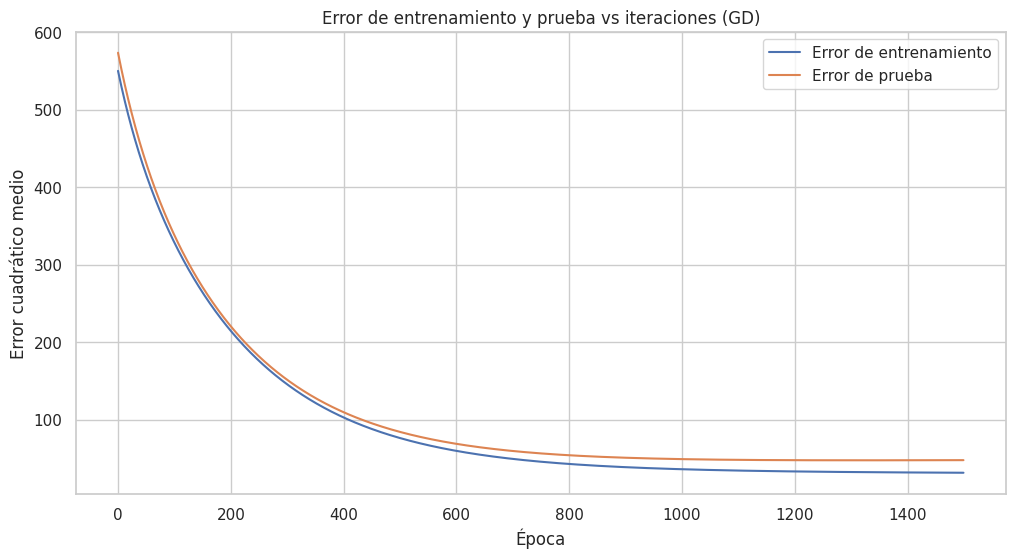

In [23]:
coef_gd = gradient_descent(X_train_scaled, y_train, X_test_scaled, y_test, lr=0.0012, epochs=1500, graph=True)

Coeficientes: [[ 0.41587183]
 [ 1.45864651]
 [-1.23697236]
 [ 1.86722995]
 [-0.69496923]
 [ 2.44195013]
 [-0.35026211]
 [-2.79770555]
 [ 0.25212549]
 [-0.217733  ]
 [-1.67839918]
 [ 0.75500489]
 [-3.97544152]]

Ordenada al origen: [22.00180278]



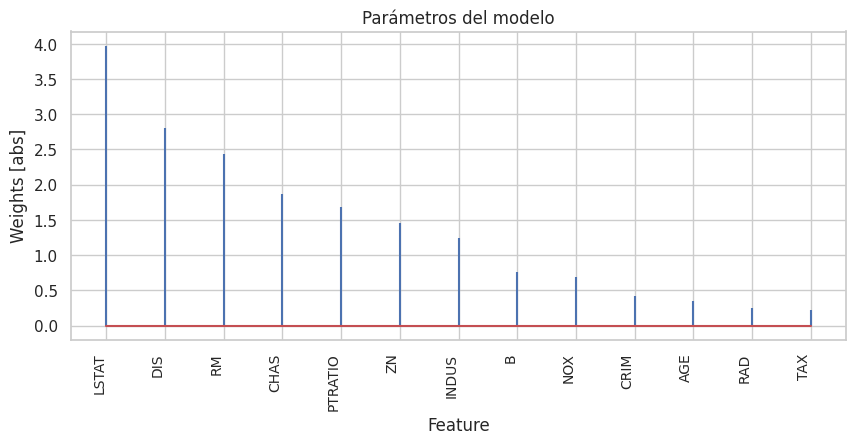


RMSE para datos de train: 5.647877431968732
R2 para datos de train: 0.6512492212408092

RMSE para datos de test: 6.938451744878284
R2 para datos de test: 0.4211722991295893


In [24]:
# Predecimos los valores de salida
y_pred_gd = linear_model(X_test_scaled, coef_gd)
print(f'Coeficientes: {coef_gd[1:]}')
print(f'\nOrdenada al origen: {coef_gd[0]}\n')

#Graficamos coeficientes
df_coef_gd = pd.DataFrame({'predictor': X_train.columns, 'coef': abs(coef_gd[1:].flatten())}).sort_values(by='coef', ascending=False)
fig, ax = plt.subplots(figsize=(10, 4))
ax.stem(df_coef_gd.predictor, df_coef_gd.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('Feature')
ax.set_ylabel('Weights [abs]')
ax.set_title('Parámetros del modelo')
plt.show()

# Calculamos el error cuadrático medio (MSE) y el coeficiente de determinación (R2) para los datos de train
rmse_gd_train = mean_squared_error(y_train, linear_model(X_train_scaled, coef_gd), squared=False)
r2_gd_train = r2_score(y_train, linear_model(X_train_scaled, coef_gd))
print(f'\nRMSE para datos de train: {rmse_gd_train}')
print(f'R2 para datos de train: {r2_gd_train}')

# Calculamos el error cuadrático medio (MSE) y el coeficiente de determinación (R2) para los datos de test
rmse_gd_test = mean_squared_error(y_test, y_pred_gd, squared=False)
r2_gd_test = r2_score(y_test, y_pred_gd)
print(f'\nRMSE para datos de test: {rmse_gd_test}')
print(f'R2 para datos de test: {r2_gd_test}')

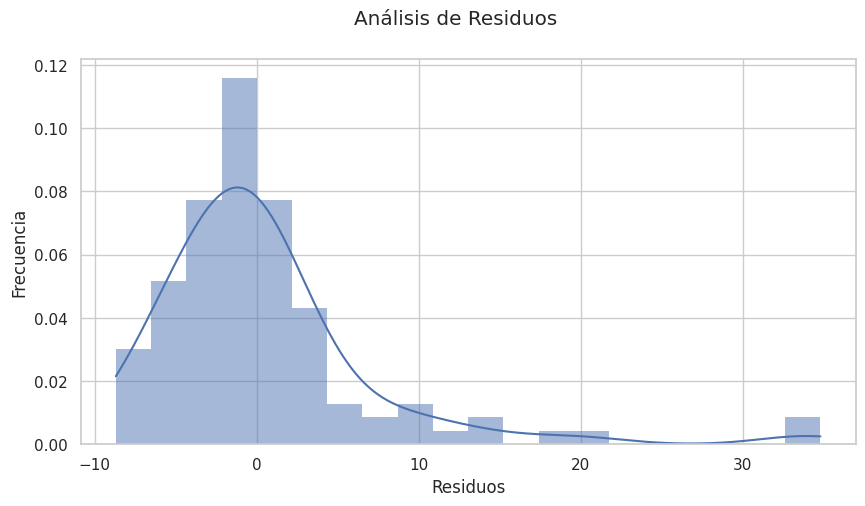

In [25]:
# Graficamos la distribución de los residuos
fig = plt.figure(figsize=(10,5))
sns.histplot((y_test - y_pred_gd), color="red", kde=True, stat="density", linewidth=0, bins=20, legend=False)
fig.suptitle('Análisis de Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

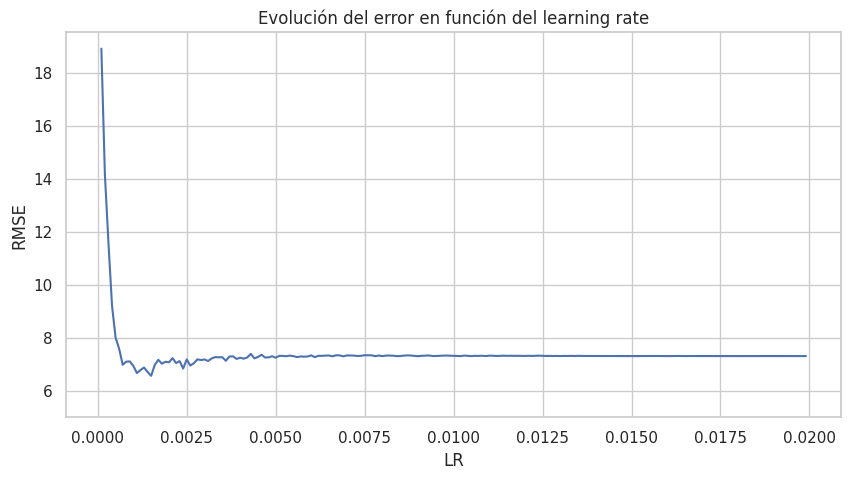

In [26]:
dict_rmse_lr = {}
for learning_rate in np.arange(0.0001, 0.02, 0.0001):
  coef_gd_lr = gradient_descent(X_train_scaled, y_train, X_test_scaled, y_test, lr=learning_rate, epochs=1500, graph=False)
  y_pred_gd_lr = linear_model(X_test_scaled, coef_gd_lr)
  rmse_gd_test_lr = mean_squared_error(y_test, y_pred_gd_lr, squared=False)
  dict_rmse_lr[learning_rate] = rmse_gd_test_lr

# Graficamos la evolución del error en función del learning rate
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(dict_rmse_lr.keys(), dict_rmse_lr.values())
ax.set_ylim([5,None])
ax.set_title('Evolución del error en función del learning rate')
ax.set_xlabel('LR')
ax.set_ylabel('RMSE')
plt.show()

In [27]:
print(f'El valor de learning rate que minimiza el error es: {min(dict_rmse_lr, key=dict_rmse_lr.get)}')

El valor de learning rate que minimiza el error es: 0.0015


#### Gradiente descendiente estocástico

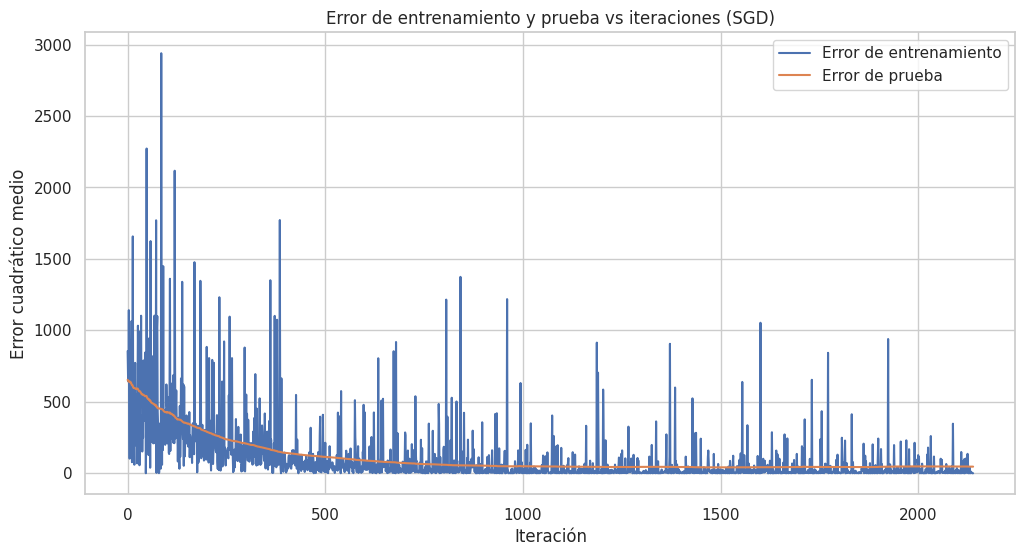

In [28]:
coef_sgd = stochastic_gradient_descent(X_train_scaled, y_train, X_test_scaled, y_test, lr=0.001, epochs=5)

Coeficientes: [[ 0.26981661]
 [ 1.04252765]
 [-0.51032269]
 [ 1.59328517]
 [-1.05653   ]
 [ 2.90274165]
 [-1.22810693]
 [-2.88845332]
 [ 0.68013322]
 [-0.85084321]
 [-1.86383691]
 [ 0.87998542]
 [-3.39686893]]

Ordenada al origen: [22.19242526]



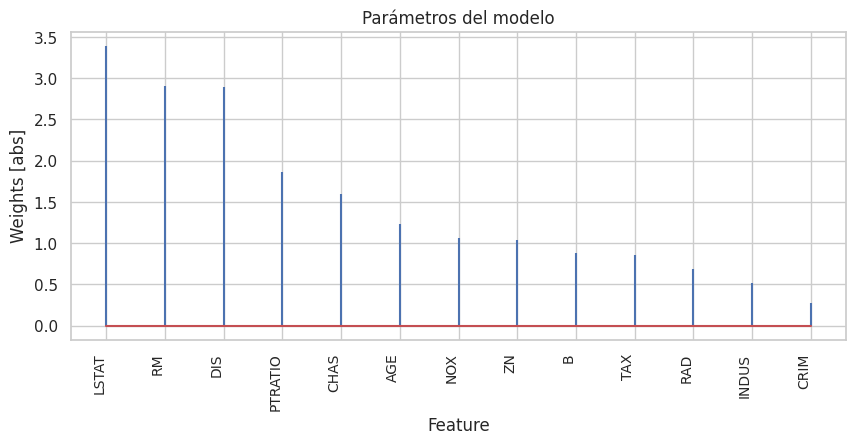


RMSE para datos de train: 5.571040542622164
R2 para datos de train: 0.6606738750602443

RMSE para datos de test: 6.8020747789558955
R2 para datos de test: 0.4437026814507632


In [29]:
# Predecimos los valores de salida
y_pred_sgd = linear_model(X_test_scaled, coef_sgd)
print(f'Coeficientes: {coef_sgd[1:]}')
print(f'\nOrdenada al origen: {coef_sgd[0]}\n')

#Graficamos coeficientes
df_coef_sgd = pd.DataFrame({'predictor': X_train.columns, 'coef': abs(coef_sgd[1:].flatten())}).sort_values(by='coef', ascending=False)
fig, ax = plt.subplots(figsize=(10, 4))
ax.stem(df_coef_sgd.predictor, df_coef_sgd.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('Feature')
ax.set_ylabel('Weights [abs]')
ax.set_title('Parámetros del modelo')
plt.show()

# Calculamos el error cuadrático medio (MSE) y el coeficiente de determinación (R2) para los datos de train
rmse_sgd_train = mean_squared_error(y_train, linear_model(X_train_scaled, coef_sgd), squared=False)
r2_sgd_train = r2_score(y_train, linear_model(X_train_scaled, coef_sgd))
print(f'\nRMSE para datos de train: {rmse_sgd_train}')
print(f'R2 para datos de train: {r2_sgd_train}')

# Calculamos el error cuadrático medio (MSE) y el coeficiente de determinación (R2) para los datos de test
rmse_sgd_test = mean_squared_error(y_test, y_pred_sgd, squared=False)
r2_sgd_test = r2_score(y_test, y_pred_sgd)
print(f'\nRMSE para datos de test: {rmse_sgd_test}')
print(f'R2 para datos de test: {r2_sgd_test}')

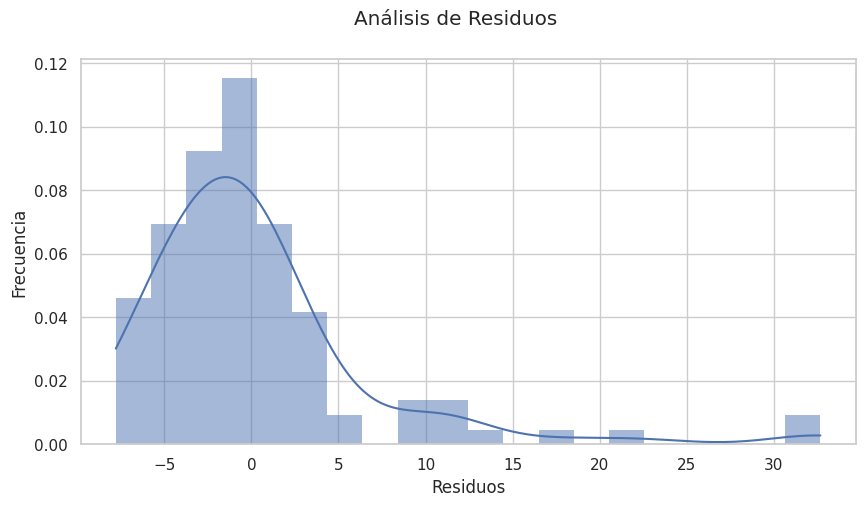

In [30]:
# Graficamos la distribución de los residuos
fig = plt.figure(figsize=(10,5))
sns.histplot((y_test - y_pred_sgd), color="red", kde=True, stat="density", linewidth=0, bins=20, legend=False)
fig.suptitle('Análisis de Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

#### Gradiente descendiente mini-batch

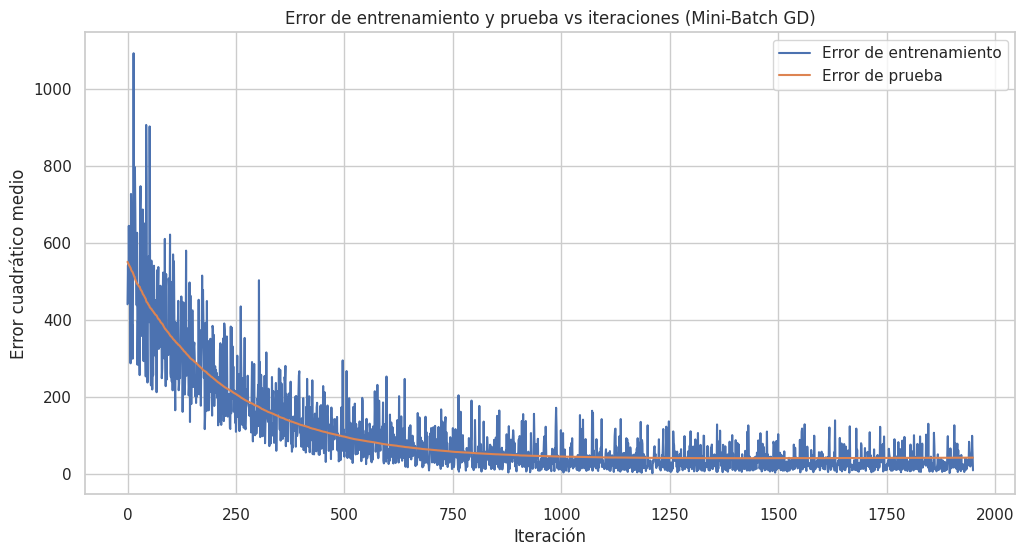

In [31]:
coef_mbgd = mini_batch_gradient_descent(X_train_scaled, y_train, X_test_scaled, y_test, lr=0.001, epochs=50)

Coeficientes: [[ 0.16922327]
 [ 0.87612127]
 [ 0.11226655]
 [ 1.72512473]
 [-0.89931539]
 [ 3.02973928]
 [-1.3310186 ]
 [-2.35083998]
 [ 1.13194369]
 [-1.39326661]
 [-1.9143073 ]
 [ 0.80657233]
 [-3.21792842]]

Ordenada al origen: [22.14883313]


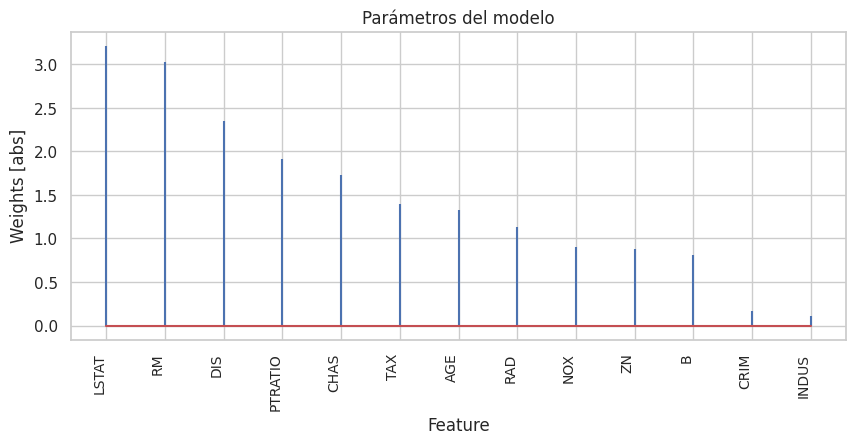


RMSE para datos de train: 5.602711845484192
R2 para datos de train: 0.6568047779342405

RMSE para datos de test: 6.47678630067177
R2 para datos de test: 0.4956369083141746


In [32]:
# Predecimos los valores de salida
y_pred_mbgd = linear_model(X_test_scaled, coef_mbgd)
print(f'Coeficientes: {coef_mbgd[1:]}')
print(f'\nOrdenada al origen: {coef_mbgd[0]}')

#Graficamos coeficientes
df_coef_mbgd = pd.DataFrame({'predictor': X_train.columns, 'coef': abs(coef_mbgd[1:].flatten())}).sort_values(by='coef', ascending=False)
fig, ax = plt.subplots(figsize=(10, 4))
ax.stem(df_coef_mbgd.predictor, df_coef_mbgd.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('Feature')
ax.set_ylabel('Weights [abs]')
ax.set_title('Parámetros del modelo')
plt.show()

# Calculamos el error cuadrático medio (MSE) y el coeficiente de determinación (R2) para los datos de train
rmse_mbgd_train = mean_squared_error(y_train, linear_model(X_train_scaled, coef_mbgd), squared=False)
r2_mbgd_train = r2_score(y_train, linear_model(X_train_scaled, coef_mbgd))
print(f'\nRMSE para datos de train: {rmse_mbgd_train}')
print(f'R2 para datos de train: {r2_mbgd_train}')

# Calculamos el error cuadrático medio (MSE) y el coeficiente de determinación (R2) para los datos de test
rmse_mbgd_test = mean_squared_error(y_test, y_pred_mbgd, squared=False)
r2_mbgd_test = r2_score(y_test, y_pred_mbgd)
print(f'\nRMSE para datos de test: {rmse_mbgd_test}')
print(f'R2 para datos de test: {r2_mbgd_test}')

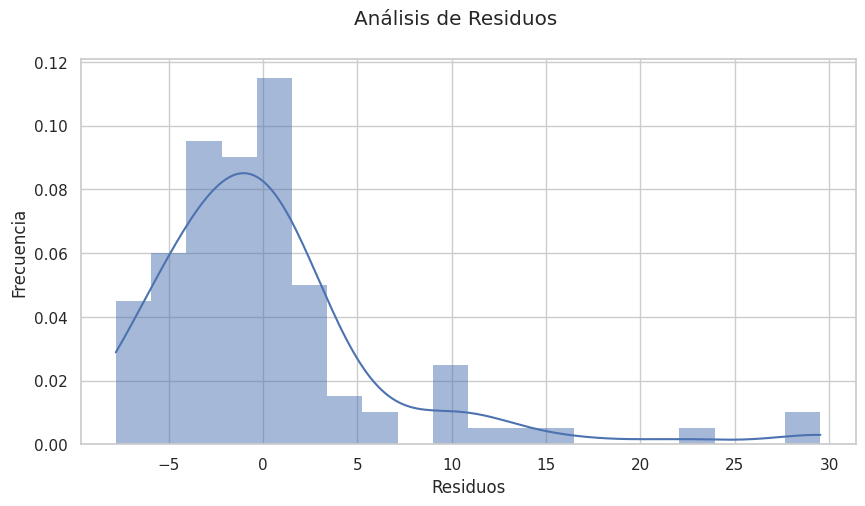

In [33]:
# Graficamos la distribución de los residuos
fig = plt.figure(figsize=(10,5))
sns.histplot((y_test - y_pred_mbgd), color="red", kde=True, stat="density", linewidth=0, bins=20, legend=False)
fig.suptitle('Análisis de Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

## Regularización

### Lasso

Coeficientes: [-0.          0.14956769 -0.          0.97781004 -0.15202231  2.37948376
 -0.01602889 -0.         -0.         -0.0388833  -1.55466473  0.07449591
 -3.70652606]

Ordenada al origen: [22.57884202]



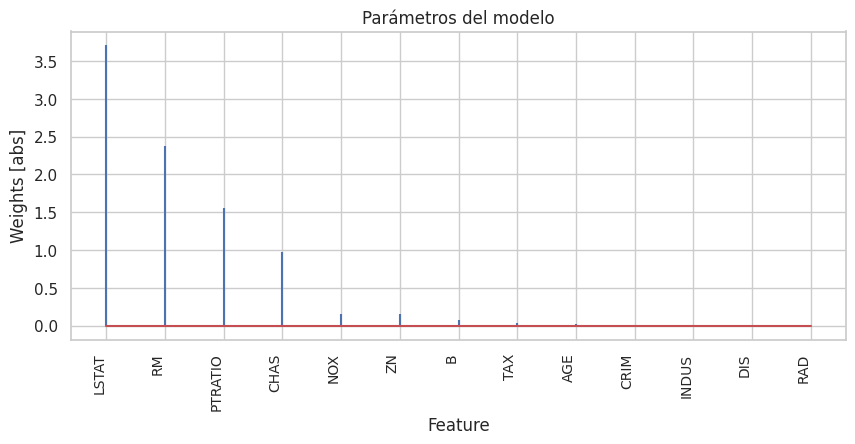


RMSE para datos de train: 6.184589368299251
R2 para datos de train: 0.5818169761922121

RMSE para datos de test: 6.309615519366132
R2 para datos de test: 0.5213368940886611


In [34]:
# Creamos un modelo basado en una regresión lineal simple
lasso = Lasso(alpha=0.75)  # alpha controla la fuerza de la regularización L1 (Lasso)
lasso.fit(X_train_scaled, y_train)

# Predecimos los valores de salida
y_pred_lasso = lasso.predict(X_test_scaled).reshape(-1,1)
print(f'Coeficientes: {lasso.coef_}')
print(f'\nOrdenada al origen: {lasso.intercept_}\n')

#Graficamos coeficientes
df_coef_lasso = pd.DataFrame({'predictor': X_train.columns, 'coef': abs(lasso.coef_.flatten())}).sort_values(by='coef', ascending=False)
fig, ax = plt.subplots(figsize=(10, 4))
ax.stem(df_coef_lasso.predictor, df_coef_lasso.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('Feature')
ax.set_ylabel('Weights [abs]')
ax.set_title('Parámetros del modelo')
plt.show()

# Calculamos el error cuadrático medio (MSE) y el coeficiente de determinación (R2) para los datos de train
rmse_lasso_train = mean_squared_error(y_train, lasso.predict(X_train_scaled), squared=False)
r2_lasso_train = r2_score(y_train, lasso.predict(X_train_scaled))
print(f'\nRMSE para datos de train: {rmse_lasso_train}')
print(f'R2 para datos de train: {r2_lasso_train}')

# Calculamos el error cuadrático medio (MSE) y el coeficiente de determinación (R2) para los datos de test
rmse_lasso_test = mean_squared_error(y_test, y_pred_lasso, squared=False)
r2_lasso_test = r2_score(y_test, y_pred_lasso)
print(f'\nRMSE para datos de test: {rmse_lasso_test}')
print(f'R2 para datos de test: {r2_lasso_test}')

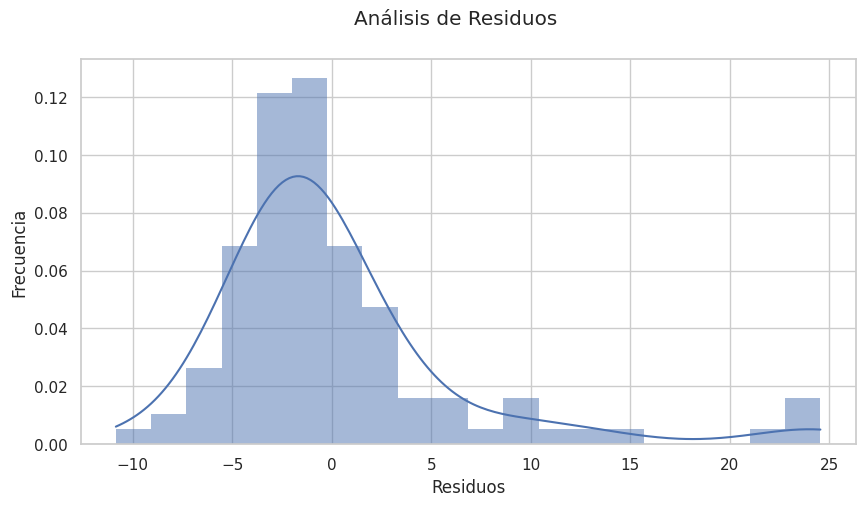

In [35]:
# Graficamos la distribución de los residuos
fig = plt.figure(figsize=(10,5))
sns.histplot((y_test - y_pred_lasso), color="red", kde=True, stat="density", linewidth=0, bins=20, legend=False)
fig.suptitle('Análisis de Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

### LassoCV

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Coeficientes: [ 0.28350278  1.65340846  0.          1.74227342 -1.8723457   2.6490807
 -1.19482509 -3.93743143  1.04179479 -1.35874702 -1.85544281  0.53301828
 -3.55685066]

Ordenada al origen: 22.578842017615816

Mejor alpha: 0.038274944785163134



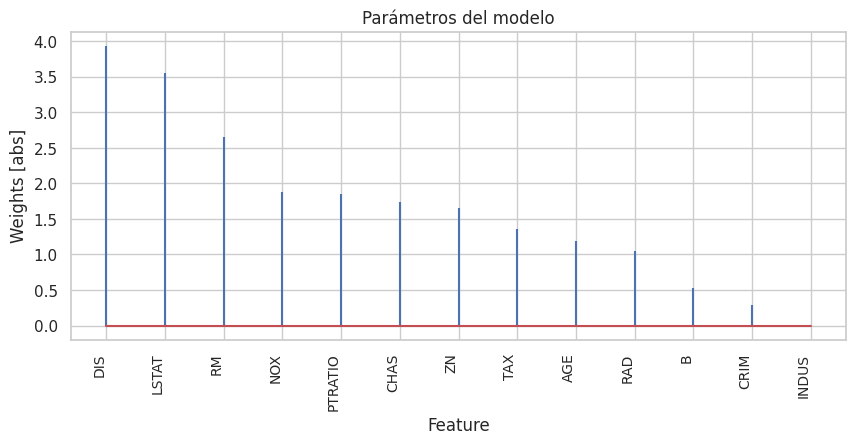


RMSE para datos de train: 5.47212886906851
R2 para datos de train: 0.6726161191692446

RMSE para datos de test: 7.269022057443622
R2 para datos de test: 0.36470397813765154


In [36]:
# Creamos un modelo basado en una regresión lineal simple
lassoCV = LassoCV(alphas = np.logspace(-3, 6, 200), fit_intercept = True, cv = 5)  # cv hace que el 20% de los datos de entrenamiento se usen para validación
lassoCV.fit(X_train_scaled, y_train)

# Predecimos los valores de salida
y_pred_lassoCV = lassoCV.predict(X_test_scaled).reshape(-1,1)
print(f'Coeficientes: {lassoCV.coef_}')
print(f'\nOrdenada al origen: {lassoCV.intercept_}')
print(f'\nMejor alpha: {lassoCV.alpha_}\n')

#Graficamos coeficientes
df_coef_lassoCV = pd.DataFrame({'predictor': X_train.columns, 'coef': abs(lassoCV.coef_.flatten())}).sort_values(by='coef', ascending=False)
fig, ax = plt.subplots(figsize=(10, 4))
ax.stem(df_coef_lassoCV.predictor, df_coef_lassoCV.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('Feature')
ax.set_ylabel('Weights [abs]')
ax.set_title('Parámetros del modelo')
plt.show()

# Calculamos el error cuadrático medio (MSE) y el coeficiente de determinación (R2) para los datos de train
rmse_lassoCV_train = mean_squared_error(y_train, lassoCV.predict(X_train_scaled), squared=False)
r2_lassoCV_train = r2_score(y_train, lassoCV.predict(X_train_scaled))
print(f'\nRMSE para datos de train: {rmse_lassoCV_train}')
print(f'R2 para datos de train: {r2_lassoCV_train}')

# Calculamos el error cuadrático medio (MSE) y el coeficiente de determinación (R2) para los datos de test
rmse_lassoCV_test = mean_squared_error(y_test, y_pred_lassoCV, squared=False)
r2_lassoCV_test = r2_score(y_test, y_pred_lassoCV)
print(f'\nRMSE para datos de test: {rmse_lassoCV_test}')
print(f'R2 para datos de test: {r2_lassoCV_test}')

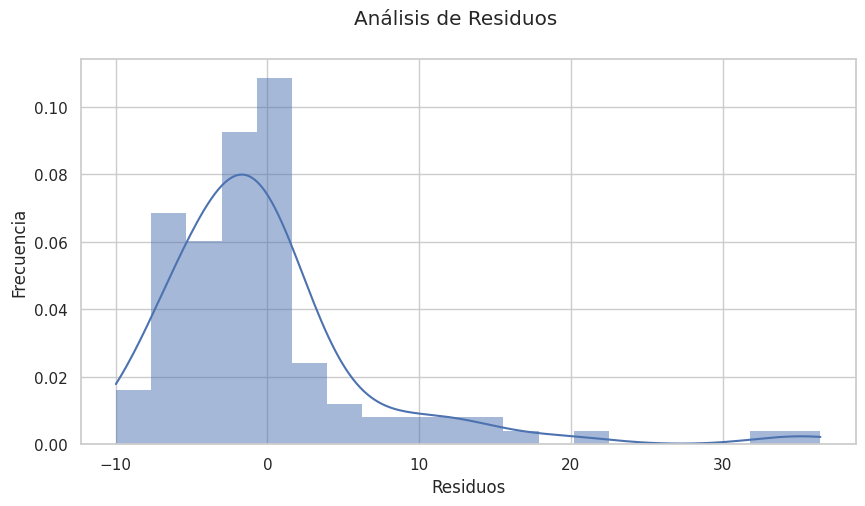

In [37]:
# Graficamos la distribución de los residuos
fig = plt.figure(figsize=(10,5))
sns.histplot((y_test - y_pred_lassoCV), color="red", kde=True, stat="density", linewidth=0, bins=20, legend=False)
fig.suptitle('Análisis de Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

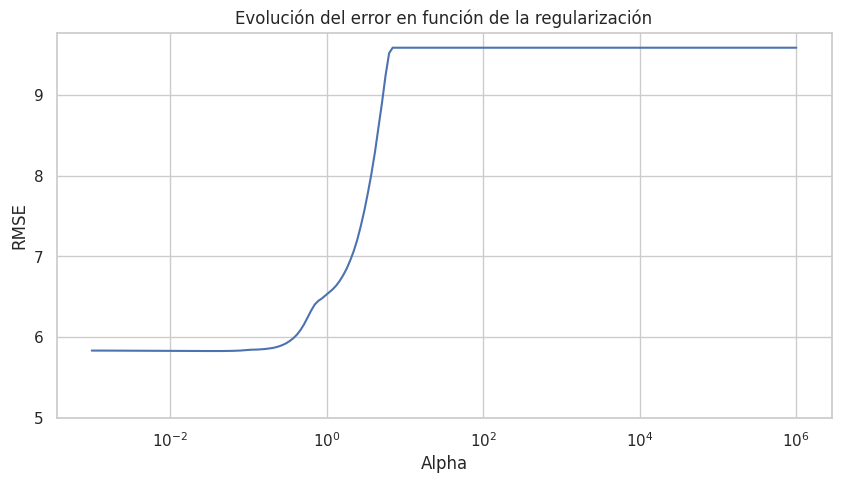

In [38]:
# Evolución del error de validación cruzada en función de Alpha
mse_cv = lassoCV.mse_path_.mean(axis=1)

# Se aplica la raíz cuadrada para pasar de MSE a RMSE
rmse_cv = np.sqrt(mse_cv)

# Se identifica el mejor RMSE
min_rmse     = np.min(rmse_cv)
optimo       = lassoCV.alphas_[np.argmin(rmse_cv)]

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(lassoCV.alphas_, rmse_cv)
ax.set_xscale('log')
ax.set_ylim([5,None])
ax.set_title('Evolución del error en función de la regularización')
ax.set_xlabel('Alpha')
ax.set_ylabel('RMSE')
plt.show()

### Ridge

Coeficientes: [[ 0.33530904  1.73267738  0.18004086  1.74587185 -2.02619396  2.6760375
  -1.26054474 -4.09497629  1.40843818 -1.74449639 -1.92246871  0.58357601
  -3.54085607]]

Ordenada al origen: [22.57884202]



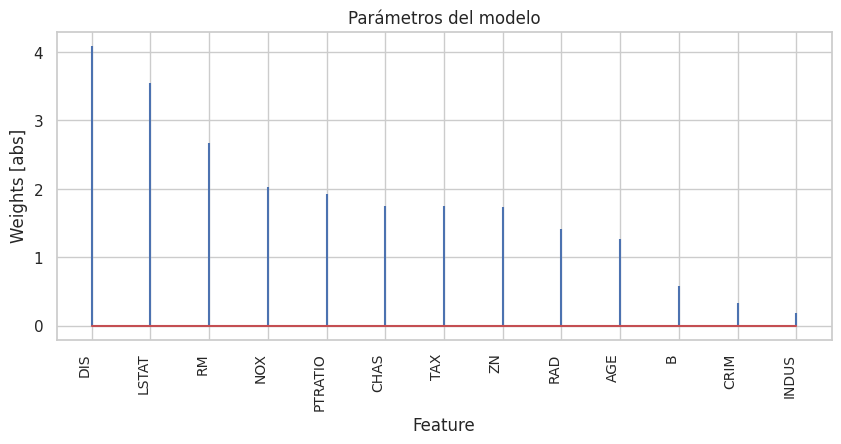


RMSE para datos de train: 5.466666580273116
R2 para datos de train: 0.6732693833090385

RMSE para datos de test: 7.294121706430181
R2 para datos de test: 0.3603090988879324


In [39]:
# Creamos un modelo basado en una regresión lineal simple
ridge = Ridge(alpha=0.8)  # alpha controla la fuerza de la regularización L2 (Ridge)
ridge.fit(X_train_scaled, y_train)

# Predecimos los valores de salida
y_pred_ridge = ridge.predict(X_test_scaled).reshape(-1,1)
print(f'Coeficientes: {ridge.coef_}')
print(f'\nOrdenada al origen: {ridge.intercept_}\n')

#Graficamos coeficientes
df_coef_ridge = pd.DataFrame({'predictor': X_train.columns, 'coef': abs(ridge.coef_.flatten())}).sort_values(by='coef', ascending=False)
fig, ax = plt.subplots(figsize=(10, 4))
ax.stem(df_coef_ridge.predictor, df_coef_ridge.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('Feature')
ax.set_ylabel('Weights [abs]')
ax.set_title('Parámetros del modelo')
plt.show()

# Calculamos el error cuadrático medio (MSE) y el coeficiente de determinación (R2) para los datos de train
rmse_ridge_train = mean_squared_error(y_train, ridge.predict(X_train_scaled), squared=False)
r2_ridge_train = r2_score(y_train, ridge.predict(X_train_scaled))
print(f'\nRMSE para datos de train: {rmse_ridge_train}')
print(f'R2 para datos de train: {r2_ridge_train}')

# Calculamos el error cuadrático medio (MSE) y el coeficiente de determinación (R2) para los datos de test
rmse_ridge_test = mean_squared_error(y_test, y_pred_ridge, squared=False)
r2_ridge_test = r2_score(y_test, y_pred_ridge)
print(f'\nRMSE para datos de test: {rmse_ridge_test}')
print(f'R2 para datos de test: {r2_ridge_test}')

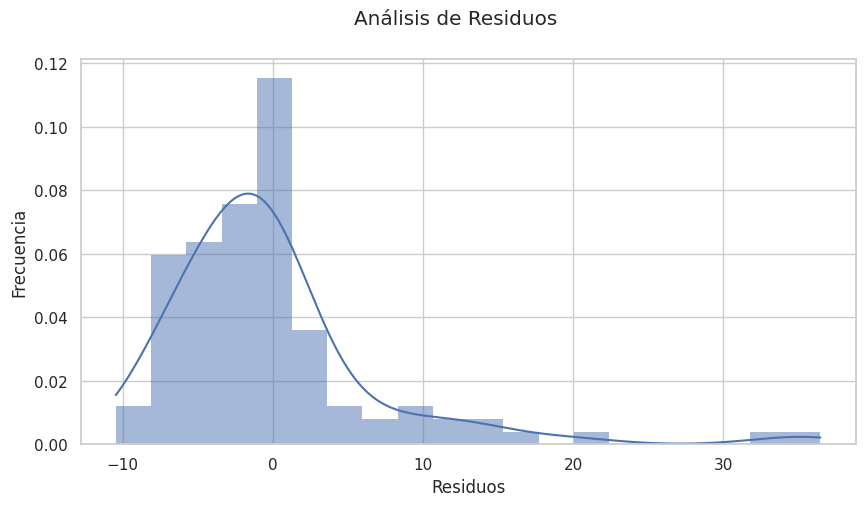

In [40]:
# Graficamos la distribución de los residuos
fig = plt.figure(figsize=(10,5))
sns.histplot((y_test - y_pred_ridge), color="red", kde=True, stat="density", linewidth=0, bins=20, legend=False)
fig.suptitle('Análisis de Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

### RidgeCV

Coeficientes: [[ 0.30438666  1.54647023  0.00947283  1.71040978 -1.74127069  2.65525591
  -1.1844898  -3.64620858  1.0465324  -1.36624049 -1.85955297  0.60677567
  -3.44615263]]

Ordenada al origen: [22.57884202]

Mejor alpha: 14.481182276745331



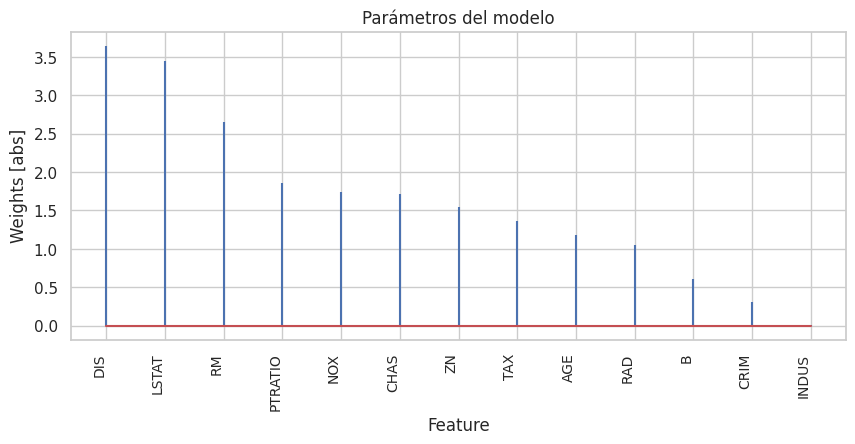


RMSE para datos de train: 5.479699601448178
R2 para datos de train: 0.6717096162914189

RMSE para datos de test: 7.11072494167799
R2 para datos de test: 0.3920723151693055


In [41]:
# Creamos un modelo basado en una regresión lineal simple
ridgeCV = RidgeCV(alphas = np.logspace(-3, 6, 200), fit_intercept = True, store_cv_values = True)  # cv hace que el 20% de los datos de entrenamiento se usen para validación
ridgeCV.fit(X_train_scaled, y_train)

# Predecimos los valores de salida
y_pred_ridgeCV = ridgeCV.predict(X_test_scaled).reshape(-1,1)
print(f'Coeficientes: {ridgeCV.coef_}')
print(f'\nOrdenada al origen: {ridgeCV.intercept_}')
print(f'\nMejor alpha: {ridgeCV.alpha_}\n')

#Graficamos coeficientes
df_coef_ridgeCV = pd.DataFrame({'predictor': X_train.columns, 'coef': abs(ridgeCV.coef_.flatten())}).sort_values(by='coef', ascending=False)
fig, ax = plt.subplots(figsize=(10, 4))
ax.stem(df_coef_ridgeCV.predictor, df_coef_ridgeCV.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('Feature')
ax.set_ylabel('Weights [abs]')
ax.set_title('Parámetros del modelo')
plt.show()

# Calculamos el error cuadrático medio (MSE) y el coeficiente de determinación (R2) para los datos de train
rmse_ridgeCV_train = mean_squared_error(y_train, ridgeCV.predict(X_train_scaled), squared=False)
r2_ridgeCV_train = r2_score(y_train, ridgeCV.predict(X_train_scaled))
print(f'\nRMSE para datos de train: {rmse_ridgeCV_train}')
print(f'R2 para datos de train: {r2_ridgeCV_train}')

# Calculamos el error cuadrático medio (MSE) y el coeficiente de determinación (R2) para los datos de test
rmse_ridgeCV_test = mean_squared_error(y_test, y_pred_ridgeCV, squared=False)
r2_ridgeCV_test = r2_score(y_test, y_pred_ridgeCV)
print(f'\nRMSE para datos de test: {rmse_ridgeCV_test}')
print(f'R2 para datos de test: {r2_ridgeCV_test}')

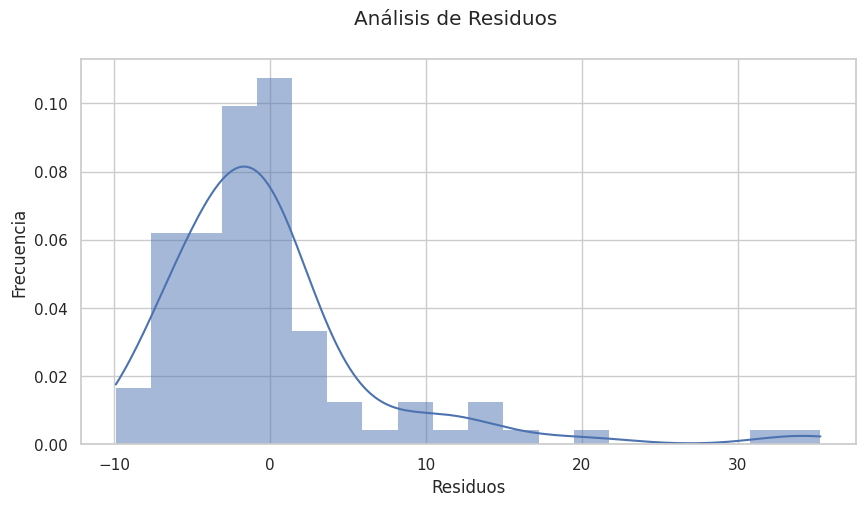

In [42]:
# Graficamos la distribución de los residuos
fig = plt.figure(figsize=(10,5))
sns.histplot((y_test - y_pred_ridgeCV), color="red", kde=True, stat="density", linewidth=0, bins=20, legend=False)
fig.suptitle('Análisis de Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

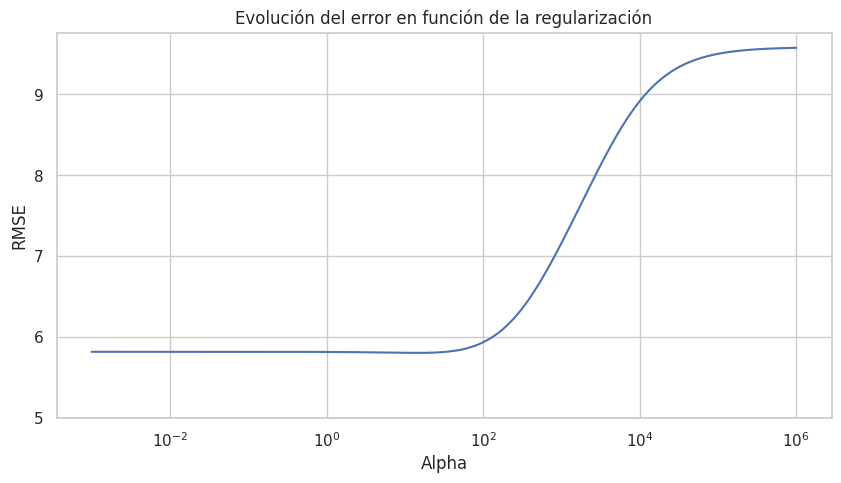

In [43]:
# Evolución del error de validación cruzada en función de Alpha
mse_cv = ridgeCV.cv_values_.reshape((-1, 200)).mean(axis=0)

# Se aplica la raíz cuadrada para pasar de MSE a RMSE
rmse_cv = np.sqrt(mse_cv)

# Se identifica el mejor
min_rmse     = np.min(rmse_cv)
optimo       = ridgeCV.alphas[np.argmin(rmse_cv)]

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ridgeCV.alphas, rmse_cv)
ax.set_xscale('log')
ax.set_ylim([5,None])
ax.set_title('Evolución del error en función de la regularización')
ax.set_xlabel('Alpha')
ax.set_ylabel('RMSE')
plt.show()

### ElasticNet

Coeficientes: [-0.          0.42818885 -0.          0.95539054 -0.3895432   2.2642675
 -0.39640172 -0.4361548  -0.         -0.40484246 -1.41413581  0.28850382
 -2.81177183]

Ordenada al origen: [22.57884202]



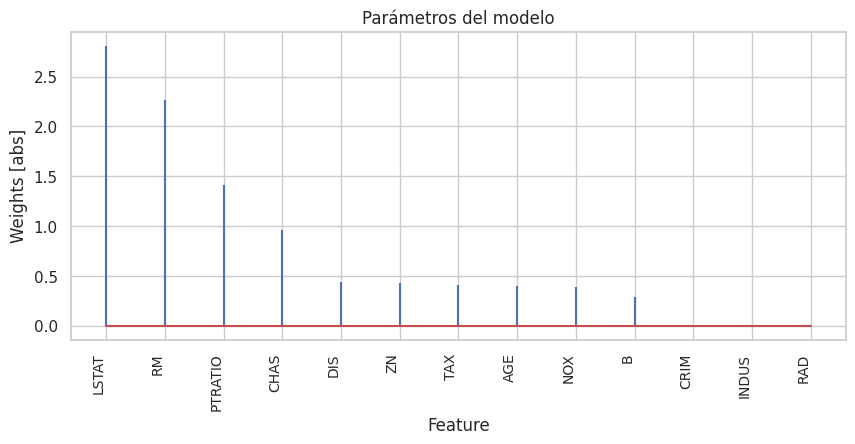


RMSE para datos de train: 6.151846280385634
R2 para datos de train: 0.5862332296589188

RMSE para datos de test: 6.335679258753791
R2 para datos de test: 0.5173742064087559


In [44]:
# Creamos un modelo basado en una regresión lineal simple
elasticnet = ElasticNet(alpha=0.8, l1_ratio=0.7)
elasticnet.fit(X_train_scaled, y_train)

# Predecimos los valores de salida
y_pred_elasticnet = elasticnet.predict(X_test_scaled).reshape(-1,1)
print(f'Coeficientes: {elasticnet.coef_}')
print(f'\nOrdenada al origen: {elasticnet.intercept_}\n')

#Graficamos coeficientes
df_coef_elasticnet = pd.DataFrame({'predictor': X_train.columns, 'coef': abs(elasticnet.coef_.flatten())}).sort_values(by='coef', ascending=False)
fig, ax = plt.subplots(figsize=(10, 4))
ax.stem(df_coef_elasticnet.predictor, df_coef_elasticnet.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('Feature')
ax.set_ylabel('Weights [abs]')
ax.set_title('Parámetros del modelo')
plt.show()

# Calculamos el error cuadrático medio (MSE) y el coeficiente de determinación (R2) para los datos de train
rmse_elasticnet_train = mean_squared_error(y_train, elasticnet.predict(X_train_scaled), squared=False)
r2_elasticnet_train = r2_score(y_train, elasticnet.predict(X_train_scaled))
print(f'\nRMSE para datos de train: {rmse_elasticnet_train}')
print(f'R2 para datos de train: {r2_elasticnet_train}')

# Calculamos el error cuadrático medio (MSE) y el coeficiente de determinación (R2) para los datos de test
rmse_elasticnet_test = mean_squared_error(y_test, y_pred_elasticnet, squared=False)
r2_elasticnet_test = r2_score(y_test, y_pred_elasticnet)
print(f'\nRMSE para datos de test: {rmse_elasticnet_test}')
print(f'R2 para datos de test: {r2_elasticnet_test}')

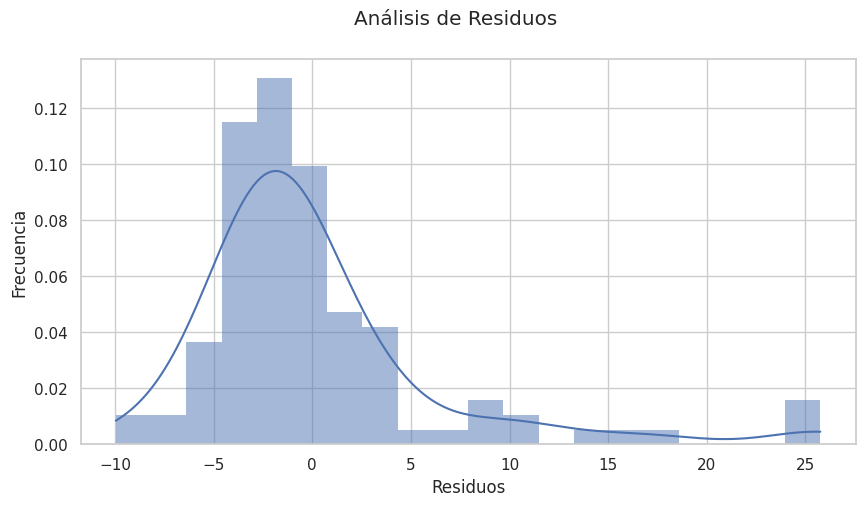

In [45]:
# Graficamos la distribución de los residuos
fig = plt.figure(figsize=(10,5))
sns.histplot((y_test - y_pred_elasticnet), color="red", kde=True, stat="density", linewidth=0, bins=20, legend=False)
fig.suptitle('Análisis de Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

### ElasticNetCV

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Coeficientes: [ 0.27880246  1.55375807 -0.          1.7114492  -1.7430167   2.65085019
 -1.16990741 -3.66776363  0.95556702 -1.28296715 -1.84265476  0.57022129
 -3.4781644 ]

Ordenada al origen: 22.578842017615816

Mejor alpha: 0.047137531341167244



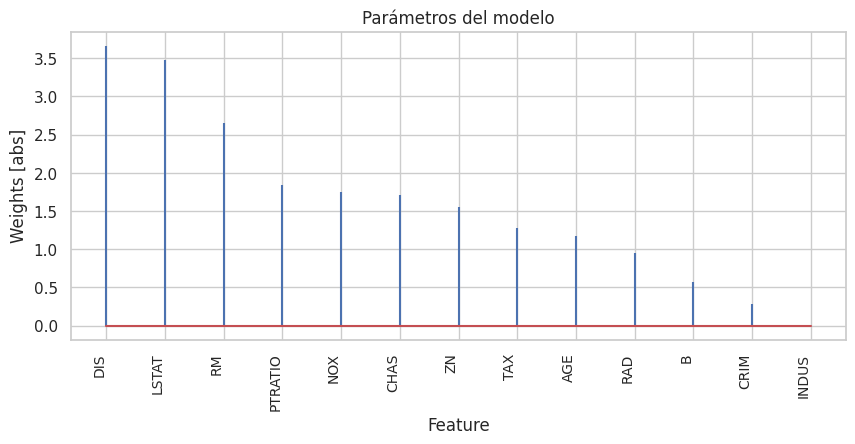


RMSE para datos de train: 5.480595661314846
R2 para datos de train: 0.6716022411028011

RMSE para datos de test: 7.142692869348977
R2 para datos de test: 0.38659386567568


In [46]:
# Creamos un modelo basado en una regresión lineal simple
elasticnetCV = ElasticNetCV(alphas = np.logspace(-3, 6, 200), fit_intercept = True, cv = 5) # cv hace que el 20% de los datos de entrenamiento se usen para validación
elasticnetCV.fit(X_train_scaled, y_train)

# Predecimos los valores de salida
y_pred_elasticnetCV = elasticnetCV.predict(X_test_scaled).reshape(-1,1)
print(f'Coeficientes: {elasticnetCV.coef_}')
print(f'\nOrdenada al origen: {elasticnetCV.intercept_}')
print(f'\nMejor alpha: {elasticnetCV.alpha_}\n')

#Graficamos coeficientes
df_coef_elasticnetCV = pd.DataFrame({'predictor': X_train.columns, 'coef': abs(elasticnetCV.coef_.flatten())}).sort_values(by='coef', ascending=False)
fig, ax = plt.subplots(figsize=(10, 4))
ax.stem(df_coef_elasticnetCV.predictor, df_coef_elasticnetCV.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('Feature')
ax.set_ylabel('Weights [abs]')
ax.set_title('Parámetros del modelo')
plt.show()

# Calculamos el error cuadrático medio (MSE) y el coeficiente de determinación (R2) para los datos de train
rmse_elasticnetCV_train = mean_squared_error(y_train, elasticnetCV.predict(X_train_scaled), squared=False)
r2_elasticnetCV_train = r2_score(y_train, elasticnetCV.predict(X_train_scaled))
print(f'\nRMSE para datos de train: {rmse_elasticnetCV_train}')
print(f'R2 para datos de train: {r2_elasticnetCV_train}')

# Calculamos el error cuadrático medio (MSE) y el coeficiente de determinación (R2) para los datos de test
rmse_elasticnetCV_test = mean_squared_error(y_test, y_pred_elasticnetCV, squared=False)
r2_elasticnetCV_test = r2_score(y_test, y_pred_elasticnetCV)
print(f'\nRMSE para datos de test: {rmse_elasticnetCV_test}')
print(f'R2 para datos de test: {r2_elasticnetCV_test}')

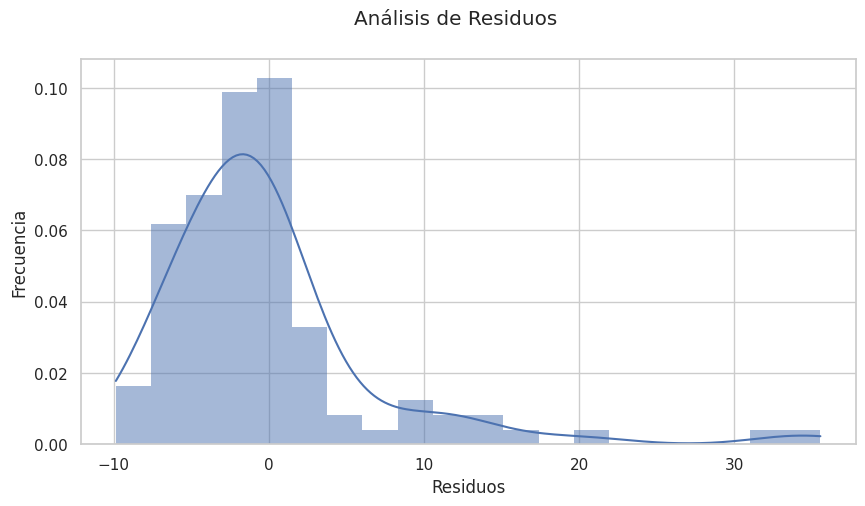

In [47]:
# Graficamos la distribución de los residuos
fig = plt.figure(figsize=(10,5))
sns.histplot((y_test - y_pred_elasticnetCV), color="red", kde=True, stat="density", linewidth=0, bins=20, legend=False)
fig.suptitle('Análisis de Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

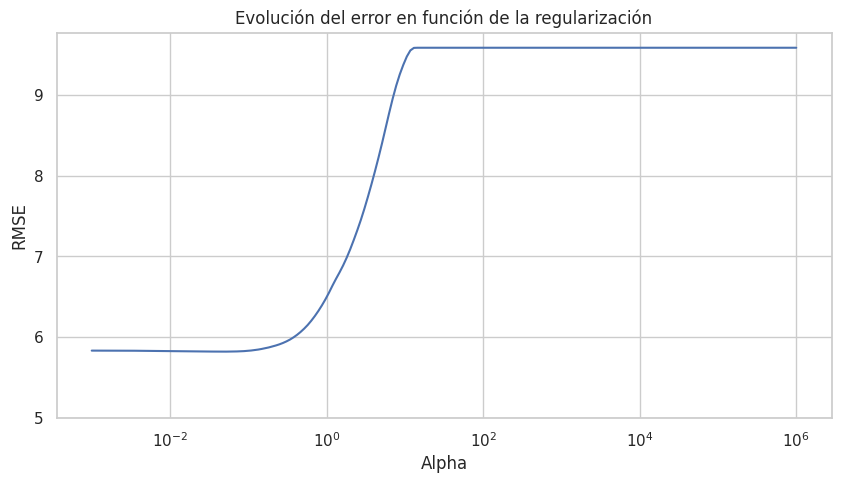

In [48]:
# Evolución del error de validación cruzada en función de Alpha
mse_cv = elasticnetCV.mse_path_.mean(axis=1)

# Se aplica la raíz cuadrada para pasar de MSE a RMSE
rmse_cv = np.sqrt(mse_cv)

# Se identifica el mejor RMSE
min_rmse     = np.min(rmse_cv)
optimo       = elasticnetCV.alphas_[np.argmin(rmse_cv)]

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(elasticnetCV.alphas_, rmse_cv)
ax.set_xscale('log')
ax.set_ylim([5,None])
ax.set_title('Evolución del error en función de la regularización')
ax.set_xlabel('Alpha')
ax.set_ylabel('RMSE')
plt.show()

## Análisis de datos

***Sobre los coeficientes***

Observamos que en la mayoría de los modelos, las variables que más influencia tendrían sobre la salida, suelen ser 'LSTAT' y 'RM', que son también las que mantienen una correlación lineal más fuerte con la misma entre todas las variables. La variable 'DIS' también suele estar entre las que mejor explicarían la variable de salida 'MEDV', lo cual no podemos explicar en función de la correlación de Pearson entre las variables.

***Sobre los residuos***

En los gráficos de residuos de todos los modelos, observamos una distribución campanular con una asimetría hacia la derecha. El grueso de la campana se sitúa en valores de error que varian en el rango [-10:10] para algunos casos y [-5:5] para otros. A su vez, existen errores dispersos en el lado positivo de la cola, lo que se explica por la asimetría propia presenta en la distribución datos de 'MEDV', donde la mayoría de los valores son pequeños.

***Sobre los hiperparámetros***

Realizamos varios ensayos variando hiperparámetros sobre distintos modelos y evaluando el valor del RMSE.

Para el modelo hallado por el método del gradiente descendiente, el RMSE adopta un valor grande para LR cercanos a cero, posiblemente porque se encuentre con mínimos locales. A medida que el LR crece, el modelo puede aproximar mejor las predicciones a la realidad, mejorando el RMSE. Las oscilaciones se explican porque la función arranca a iterar siempre desde un punto aleatorio. A partir de un LR dado, ya no se observan mejoras.

Para los modelos obtenidos por los métodos de Lasso, Ridge y ElasticNet, el comportamiento del RMSE al variar el hiperparámetro 'alpha' ('lambda' en la teoría) es similar. Para valores de alpha muy bajos, vemos que el valor de RMSE casi no varía y adopta un valor mínimo. Esto se debe a que el término que contempla la sumatoria de los coeficientes se vuelve despreciable frente al RSS, comportándose el modelo casi como una regresión lineal. A partir de un valor determinado, el RMSE comienza a crecer hasta alcanzar un valor máximo que permanece constante independientemente del valor de alpha. Aquí, las funciones buscan minimizar el valor de los coeficientes independientemente del RSS.

***Sobre los resultados***

Durante la resolución del problema, elegimos calcular las métricas RMSE y R2 tanto para los datos de entrenamiento como para los datos de prueba, esto fue realizado para determinar la calidad de ajuste del modelo. De obtener buenas métricas para los datos de entrenamiento (RMSE bajo y R2 alto) y métricas mucho peores para los datos de prueba, podría indicar un sobreajuste. Por el contrario, tener malas métricas en ambos sets indicarían un subajuste. Lo ideal, es encontrar un balance entre los errores de entrenamiento y los errores de prueba, ya que nunca se van a poder optimizar ambos errores a la vez.

Tomamos entonces todos RMSE y R2 calculados tanto para los datos de entrenamiento como de pruebas y los graficamos ordenados según su calidad para compararlos.

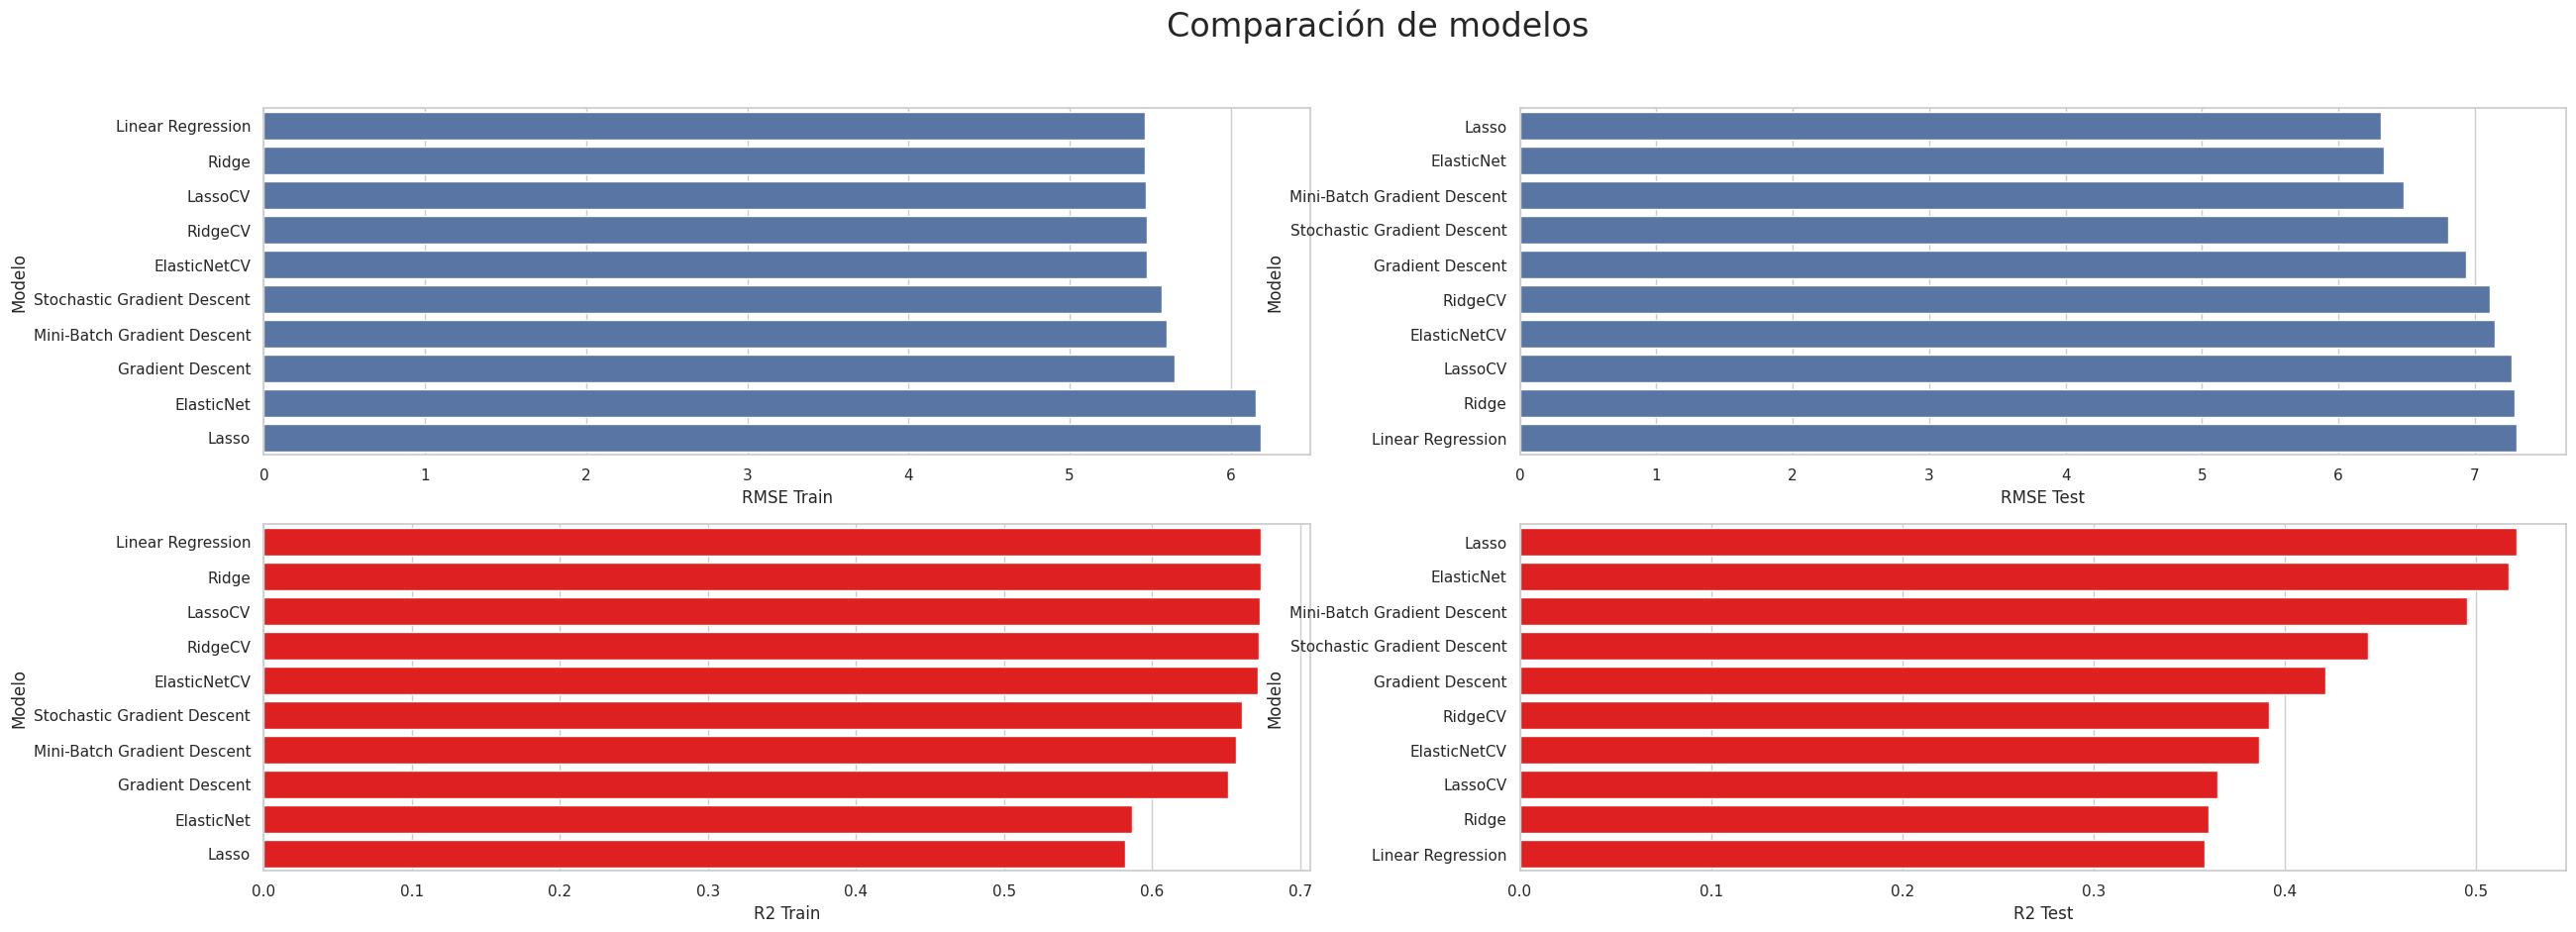

In [49]:
# Creamos diccionarios con los valores de RMSE y R2 para entrenamiento y pruebas.
dict_rmse_train = {'Linear Regression': rmse_lr_train, 'Gradient Descent': rmse_gd_train, 'Stochastic Gradient Descent': rmse_sgd_train, 'Mini-Batch Gradient Descent': rmse_mbgd_train,
                  'Lasso': rmse_lasso_train, 'LassoCV': rmse_lassoCV_train, 'Ridge': rmse_ridge_train, 'RidgeCV': rmse_ridgeCV_train, 'ElasticNet': rmse_elasticnet_train, 'ElasticNetCV': rmse_elasticnetCV_train}
dict_rmse_test = {'Linear Regression': rmse_lr_test, 'Gradient Descent': rmse_gd_test, 'Stochastic Gradient Descent': rmse_sgd_test, 'Mini-Batch Gradient Descent': rmse_mbgd_test,
                  'Lasso': rmse_lasso_test, 'LassoCV': rmse_lassoCV_test, 'Ridge': rmse_ridge_test, 'RidgeCV': rmse_ridgeCV_test, 'ElasticNet': rmse_elasticnet_test, 'ElasticNetCV': rmse_elasticnetCV_test}
dict_r2_train = {'Linear Regression': r2_lr_train, 'Gradient Descent': r2_gd_train, 'Stochastic Gradient Descent': r2_sgd_train, 'Mini-Batch Gradient Descent': r2_mbgd_train,
                  'Lasso': r2_lasso_train, 'LassoCV': r2_lassoCV_train, 'Ridge': r2_ridge_train, 'RidgeCV': r2_ridgeCV_train, 'ElasticNet': r2_elasticnet_train, 'ElasticNetCV': r2_elasticnetCV_train}
dict_r2_test = {'Linear Regression': r2_lr_test, 'Gradient Descent': r2_gd_test, 'Stochastic Gradient Descent': r2_sgd_test, 'Mini-Batch Gradient Descent': r2_mbgd_test,
                  'Lasso': r2_lasso_test, 'LassoCV': r2_lassoCV_test, 'Ridge': r2_ridge_test, 'RidgeCV': r2_ridgeCV_test, 'ElasticNet': r2_elasticnet_test, 'ElasticNetCV': r2_elasticnetCV_test}

# Convertimos los diccionarios a DataFrames. En el proceso los ordenamos según calidad.
df_rmse_train = pd.DataFrame(dict_rmse_train.items(), columns=['Modelo', 'RMSE Train']).sort_values(by='RMSE Train')
df_rmse_test = pd.DataFrame(dict_rmse_test.items(), columns=['Modelo', 'RMSE Test']).sort_values(by='RMSE Test')
df_r2_train = pd.DataFrame(dict_r2_train.items(), columns=['Modelo', 'R2 Train']).sort_values(by='R2 Train', ascending=False)
df_r2_test = pd.DataFrame(dict_r2_test.items(), columns=['Modelo', 'R2 Test']).sort_values(by='R2 Test', ascending=False)

# Graficamos.
fig, axs = plt.subplots(2,2, figsize=(30,10))
sns.barplot(data=df_rmse_train, y='Modelo', x='RMSE Train', ax=axs[0,0])
sns.barplot(data=df_rmse_test, y='Modelo', x='RMSE Test', ax=axs[0,1])
sns.barplot(data=df_r2_train, y='Modelo', x='R2 Train', ax=axs[1,0], color='red')
sns.barplot(data=df_r2_test, y='Modelo', x='R2 Test', ax=axs[1,1], color='red')
plt.suptitle('Comparación de modelos', fontsize=24)
plt.show()

Vemos que para los datos de entrenamiento, es el modelo obtenido por el método de Linear Regression el que da mejores valores de RMSE y R2 para los datos de entrenamiento, es decir, un RMSE bajo y un R2 alto en comparación con los otros modelos. A pesar de esto, para los datos de prueba, obtenemos los mejores resultados con el modelo obtenido usando el método Lasso, donde su RMSE es el más bajo de todos y su R2 es el más alto.

Sin embargo, mencionamos anteriormente que hay que encontrar un buen balance entre los errores de entrenamiento y los de pruebas. A partir de las gráficas observamos que los modelos de Stochastic Gradient Descent y ElasticNetCV se encontrarían empatados en balance de errores. Considerando esta información y que el método Stochastic Gradient Descent tiene un costo computacional más alto que ElasticNetCV, **elegimos como mejor opción al modelo obtenido por el método ElasticNetCV**.

## Conclusiones

A pesar de haber escogido ElasticNetCV como el método que mejor ajusta un modelo lineal sobre el dataset, consideramos que su ajuste no es del todo bueno. Que su R2 esté tan alejado de 1, implica que la regresión lineal no explica de buena forma la variabilidad de los datos. No vemos esto exclusivamente en el modelo elegido, sinó que ocurre con todos los que hemos ensayado, demostrando que quizá un modelo lineal no sea la mejor opción para explicar la variable de salida.

El ajuste de los hiperparámetros permite que los modelos expliquen mejor la variable de salida pero quizá a expensas de un mayor costo computacional. Por otro lado, el mejorar las métricas para los datos de entrenamiento a veces las empeoran para los datos de prueba, por lo que se debe efectuar el cálculo de los modelos repetidas veces hasta obtener un buen balance.

Por último, notamos que a pesar de existir una buena cantidad de criterios, el ajuste de modelos y la selección de hiperparámetros es una tarea subjetiva. Con el tiempo, esperamos conseguir aún más herramientas para un ajuste más fino y un mejor modelado.